In [1]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Read in the datasets
data = pd.read_csv('/content/drive/MyDrive/Books')
users = pd.read_csv('/content/drive/MyDrive/Users')
ratings = pd.read_csv('/content/drive/MyDrive/Ratings')

In [13]:
# Print the head of the Books DataFrame
data = data.iloc[:100000,:]
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
# Print a concise summary of the Books DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 100000 non-null  object
 1   Book-Title           100000 non-null  object
 2   Book-Author          100000 non-null  object
 3   Year-Of-Publication  100000 non-null  object
 4   Publisher            100000 non-null  object
 5   Image-URL-S          100000 non-null  object
 6   Image-URL-M          100000 non-null  object
 7   Image-URL-L          100000 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
# Print the head of the Users DataFrame
users = users.iloc[:100000,:]
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Print a concise summary of the Books DataFrame
ratings.info()

In [17]:
# Merge Books and Ratings dataframes
data = pd.merge(data,ratings,on='ISBN')

In [18]:
# Reindex and rename the columns of the DataFrame
data = data.reindex(columns=["ISBN", "User-ID", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "Book-Rating", "Image-URL-S", "Image-URL-M", "Image-URL-L"])
data.rename(columns={"User-ID" : "user_id", 'Book-Title' : 'Title', 'Book-Author' : 'Author', "Book-Rating" : "Rating"}, inplace=True)

In [19]:
# Print the head of the new dataframe
data = data.iloc[:100000,:]
data.head()

,ISBN,user_id,Title,Author,Year-Of-Publication,Publisher,Rating,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,2,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0002005018,11400,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0002005018,11676,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,0002005018,41385,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


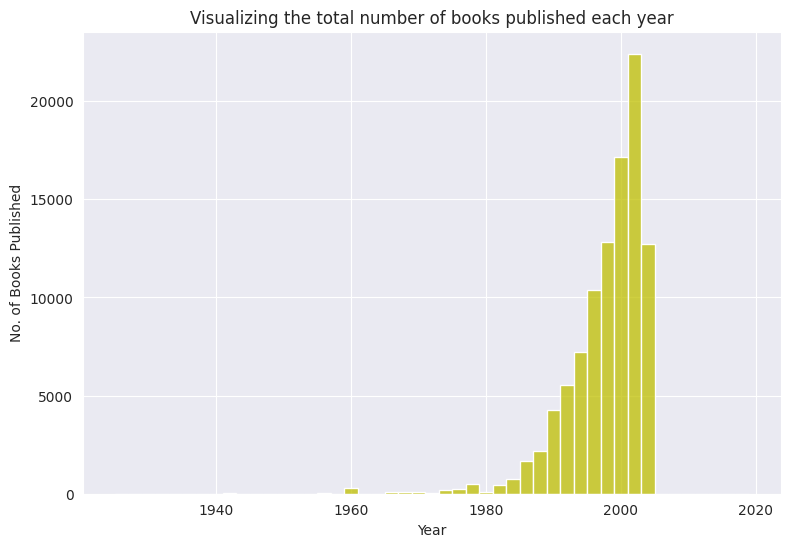

In [20]:
# Visualize the number of books published each year through histogram
data['Year-Of-Publication'] = data['Year-Of-Publication'].astype('int64')
sns.set_style('darkgrid')
fig, ax =plt.subplots()
fig.set_size_inches(9,6)
a=np.arange(1925,2021,3)
sns.histplot(data['Year-Of-Publication'],bins=np.arange(1925,2021,2),color='y')
plt.ylabel('No. of Books Published')
plt.xlabel('Year')
plt.title('Visualizing the total number of books published each year')
plt.show()

In [21]:
# Visualize the number of books published each year individaully
data['Year-Of-Publication'].value_counts()

2002    12780
1999     9917
2001     9636
2003     8815
1998     7302
2000     7215
1996     6067
1997     5518
1995     4301
1994     4227
2004     3929
1992     3629
1993     2992
1990     2480
1991     1898
1989     1788
1986     1392
1988     1101
1987     1063
0         844
1983      425
1982      391
1978      391
1984      303
1985      277
1959      235
1976      216
1970      106
1965       93
1973       91
1980       82
1968       82
1977       80
1974       76
1981       47
1975       35
1960       35
1979       23
1972       21
1966       20
1971       19
1956       19
1942       16
1962        6
1961        4
1953        4
1958        3
1941        2
1920        2
1952        1
1951        1
Name: Year-Of-Publication, dtype: int64

In [22]:
# Visualize the number of books published by each publisher
data['Publisher'].value_counts()

Ballantine Books            7422
Perennial                   4650
Pocket                      4487
Warner Books                3687
Berkley Publishing Group    3469
                            ... 
Pan Macmillan                  1
Marvel Books                   1
Kriya Yoga Publications        1
The Medici Society Ltd         1
Seuil                          1
Name: Publisher, Length: 655, dtype: int64

In [23]:
# Visualize the mean rating count of the books data
rating_cnt = pd.DataFrame(data.groupby('Title').mean()['Rating'])
rating_cnt = rating_cnt.reset_index()
px.histogram(rating_cnt,x='Rating',marginal='box',nbins=15,width=750,height=500)

In [24]:
new_data = pd.DataFrame(data.groupby("Title").mean()["Rating"])
new_data['Num_of_ratings'] = pd.DataFrame(data.groupby('Title').count()['Rating'])

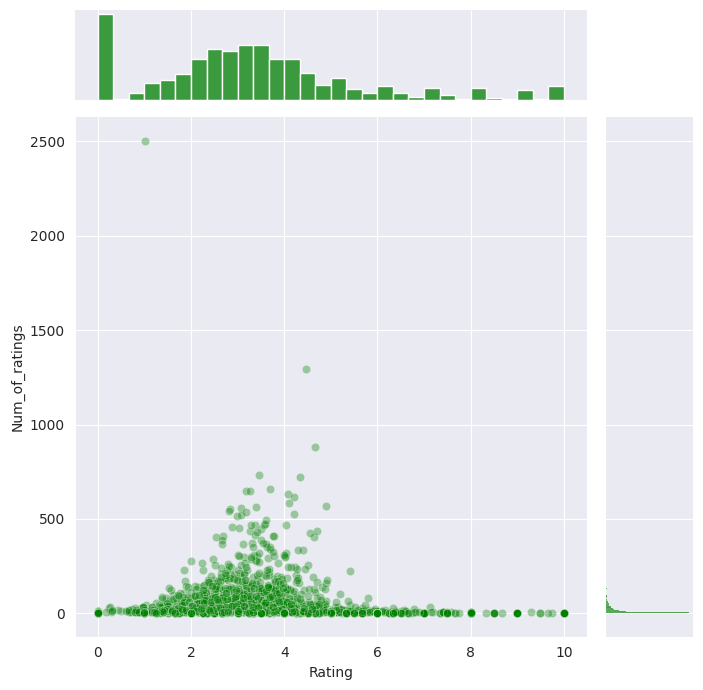

In [25]:
# Visualize the distribution of ratings
sns.jointplot(x="Rating", y="Num_of_ratings", data=new_data, alpha=0.35,height=7,color='g')
plt.show()

In [26]:
# Visualizing top 10 books with highest no. of ratings
new_data.sort_values(by=['Num_of_ratings','Rating'],ascending=False).head(10)

,Rating,Num_of_ratings
Title,,
Wild Animus,1.019584,2502
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.652322,883
Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.448087,732
The Red Tent (Bestselling Backlist),4.334716,723
Angels &amp; Demons,3.704268,656
Snow Falling on Cedars,3.268934,647
A Painted House,3.187017,647
Life of Pi,4.082278,632


In [27]:
# Visualizing top 10 most prolific authors
data.groupby('Author').count().sort_values('Rating',ascending=False)['Title'].head(10)

Author
John Grisham          3490
James Patterson       2534
Rich Shapero          2502
Dan Brown             1991
JOHN GRISHAM          1737
Mary Higgins Clark    1661
Stephen King          1455
Alice Sebold          1388
Rebecca Wells         1296
Michael Crichton      1210
Name: Title, dtype: int64

In [28]:
# Create a new DataFrame with average rating of each title and total no. of ratings
new_data = pd.DataFrame(data.groupby("Title").mean()["Rating"])
new_data['Num_of_ratings'] = pd.DataFrame(data.groupby('Title').count()['Rating'])
new_data.head()

,Rating,Num_of_ratings
Title,,
101 Dalmatians,2.947368,19
11th Hour,0.000000,2
"14,000 Things to Be Happy About",3.857143,28
1984,4.614583,192
1st to Die: A Novel,3.498721,391


In [29]:
# Create a pivot table/crosstab with the DataFrame
data_pivot = data.pivot_table(index="user_id", columns="Title", values="Rating")
data_pivot.head()

Title,101 Dalmatians,11th Hour,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,"20,000 Leagues Under the Sea (Wordsworth Collection)",2061: Odyssey Three,253,2nd Chance,...,You Be the Jury #02,You Can Surf the Net: Your Guide to the World of the Internet,You Cannot Be Serious,You're Fifty--Now What?: Investing for the Second Half of Your Life,Your Blues Ain't Like Mine,Your Erroneous Zones,Zeit im Wind.,Zen in the Art of Archery (Vintage Spiritual Classics),Zlateh the Goat and Other Stories,stardust
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Recommending top 10 books correlated with 'The Da Vinci Code'
da_vinci = pd.DataFrame(data_pivot.corrwith(data_pivot['The Da Vinci Code']),columns=['Correlation'])
da_vinci.dropna(inplace=True)
recom = da_vinci.join(new_data['Num_of_ratings'])
recom = recom.reset_index()
recom[recom.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
634,The Da Vinci Code,1.000000,883
58,America : A Jake Grafton Novel (A Jake Grafton...,1.000000,48
493,Reader,1.000000,48
453,Out of This World,0.999973,48
103,Big Trouble,0.963171,69
825,Trading Places,0.888638,58
664,The Future Scrolls,0.807415,42
88,Babyville,0.796728,58
346,"Last Dance, Last Chance (Ann Rule's Crime Files)",0.783335,66
291,Hush,0.772084,42


In [31]:
# Recommending top 10 books correlated with 'Life of Pi'
life = pd.DataFrame(data_pivot.corrwith(data_pivot['Life of Pi']),columns=['Correlation'])
life.dropna(inplace=True)
recom2 = life.join(new_data['Num_of_ratings'])
recom2 = recom2.reset_index()
recom2[recom2.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
333,Life of Pi,1.000000,632
57,America : A Jake Grafton Novel (A Jake Grafton...,1.000000,48
555,The Cat Who Tailed a Thief,1.000000,48
376,Murder at the Kennedy Center (Capital Crime My...,1.000000,46
373,Mostly Harmless,1.000000,44
3,2061: Odyssey Three,1.000000,43
455,"Red, White and Blue : A Novel",1.000000,41
244,Granny Dan,1.000000,79
173,Dead Aim,1.000000,55
98,Big Trouble,0.990152,69


In [32]:
# Recommending top 10 books correlated with 'The Secret Life of Bees'
secret = pd.DataFrame(data_pivot.corrwith(data_pivot['The Secret Life of Bees']),columns=['Correlation'])
secret.dropna(inplace=True)
recom3 = secret.join(new_data['Num_of_ratings'])
recom3 = recom3.reset_index()
recom3[recom3.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
640,The Secret Life of Bees,1.000000,615
357,Notes From a Small Planet,1.000000,87
173,EVERYTHING SHE EVER WANTED,1.000000,57
589,The Law of Similars,1.000000,43
309,Love Medicine,1.000000,43
699,Valley of the Dolls: A Novel,0.989033,49
62,Angle of Repose (Contemporary American Fiction),0.980930,56
23,A Room of One's Own,0.890646,45
705,Walk Two Moons,0.854319,59
561,The Giver (21st Century Reference),0.772478,178
